# **Dataset details**

A dataset on Global Health Statistics was obtained from Kaggle, at the following address: https://www.kaggle.com/datasets/samira1992/diabetes-intermediate-dataset <br> <br> The following code was used to import the dataset from Kaggle, using the kagglehub package suggested by Kaggle.

In [101]:
import kagglehub
import os
import pandas as pd

# Download latest version
dataset_path = kagglehub.dataset_download("samira1992/diabetes-intermediate-dataset")

file_path = os.path.join(dataset_path, "Diabetes.csv")

# Now read the CSV file using the correct file path
health_df = pd.read_csv(file_path)

Next, various commands below are used to obtain a high level summary of the dataset

In [102]:
print(health_df.head())

health_df.info()

health_df.describe()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The outputs above describe a dataframe with 767 rows and 9 columns. In the columns, there are 2 with data type float and 7 with data type integer, of which one is categorical (Outcome is encoded as 0 for No diabetes, and 1 for Having diabetes). This fits the dataset requirements, of having both numerical and categorical features, and at least one continuous target variable suitable for regression. <br> <br>

# **Dataset Pre-processing**
We next do a superficial check for any missing values in the dataset in the following code cell, by checking for empty strings and null values.

In [103]:
import numpy as np

# For empty strings:
blank_strings = health_df[health_df.map(lambda x: x == '')].dropna(how='all').dropna(axis=1, how='all')

# For NaN values:
blank_nan = health_df[health_df.isnull()].dropna(how='all').dropna(axis=1, how='all')

# Combine both to find all blank fields:
all_blanks = pd.concat([blank_strings, blank_nan])

print("Blank fields (empty strings):")
display(blank_strings)

print("\nBlank fields (NaN values):")
display(blank_nan)

print("\nAll blank fields:")
display(all_blanks)

Blank fields (empty strings):


""



Blank fields (NaN values):


""



All blank fields:


""


There are no missing values in this dataset. <br> <br> However, from the use of health_df.head(), we notice that there are some abnormalities in the above data, such as certain rows with values of 0 in the columns 'SkinThickness' or 'Insulin'. These likely indicate missing / unavailable data, as it is not logical for tricep skinfold thickness (mm) or 2-hour serum insulin (µU/ml) to be 0. <br> <br> Hence, these values will need to be addressed before we can proceed with encoding the variables, as well as other steps needed to pre-process the data for the Linear Regression and Ridge Regression Models. <br> <br> In the following code cell, we first quantify the extent of the missing values.

In [104]:
#health_df

# We create a dataframe with all the rows that have 0 values in 'SkinThickness':
zero_skin = health_df[
    (health_df["SkinThickness"] == 0)]

# We create a dataframe with all the rows that have 0 values in 'Insulin':
zero_insulin = health_df[
    (health_df["Insulin"] == 0)]

print("\nRows with 0 in 'SkinThickness':")
display(zero_skin)

print("\nRows with 0 in 'Insulin':")
display(zero_insulin)


Rows with 0 in 'SkinThickness':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0



Rows with 0 in 'Insulin':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


The amount of missing data appears to be quite severe. Out of 767 total observations, 29.6% (227 observations) have missing SkinThickness values, while 48.8% (374 observations) have missing Insulin values.

This necessitates a check for missing data in the other columns (apart from 'Pregnancies' and 'Outcome', which can logically be 0), in the following code cell.

In [105]:
#health_df

# We create a dataframe with all the rows that have 0 values
#in the remaining columns:
zero_elsewhere = health_df[
    (health_df["Glucose"] == 0) |
    (health_df["BloodPressure"] == 0) |
    (health_df["BMI"] == 0) |
    (health_df["DiabetesPedigreeFunction"] == 0) |
    (health_df["Age"] == 0)]

print("\nRows with 0 in the other columns:")
display(zero_elsewhere)



Rows with 0 in the other columns:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
75,1,0,48,20,0,24.7,0.140,22,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
172,2,87,0,23,0,28.9,0.773,25,0


There are 44 rows with missing values in any of the other columns. <br> <br> Referencing online standards, columns are removed when 40-80% of the values are missing, with the trade-off of data loss. <br> <br> In this case, the 'Insulin' column falls in this range, but given the importance of Insulin serum levels as a marker in Diabetes, removing it would be problematic. <br> <br> On the other hand, it may be worthwhile deleting rows that have too many missing values, as this also complicates the K-Nearest Neighbour or Model-based imputation methods. <br> <br> Let us investigate the the number of missing values in each row.

In [106]:
# Columns to check for missing values
columns_to_check = ['SkinThickness', 'Insulin', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a subset of the health_df dataframe
subset_df = health_df[columns_to_check]

# Replace 0 with NaN, for ease of counting with the isnull() command
subset_df = subset_df.replace(0, np.nan)

# Count missing values per row
missing_counts = subset_df.isnull().sum(axis=1)

# Add the missing value counts to the original DataFrame
health_df['missing_values_count'] = missing_counts

# Display a summary of the 'missing_values_count' column in the updated health_df DataFrame
print(health_df['missing_values_count'].value_counts())

missing_values_count
0    392
2    199
1    142
3     28
4      7
Name: count, dtype: int64


From the above output, 28 rows have 3 missing values in the columns of 'SkinThickness', 'Insulin', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction' and 'Age', while 7 rows have 4 missing values. <br> <br> These rows represent a small fraction of the total observations (4.6%), and are not too much of a concern with regard to information loss. They are more likely to impact any models we train. Hence, we remove these rows in the following code cell.

In [107]:
#create a subset of health_df called cleaned_health_df, which we will use to store the cleaned version.
cleaned_health_df = health_df[health_df['missing_values_count'] < 3]

#We take a look at the cleaned_health_df here, and notice that for most rows with only 1 missing value in those columns, the missing value is in the 'Insulin' column.
cleaned_health_df[cleaned_health_df['missing_values_count'] == 1]

#We take a look at the cleaned_health_df here, and notice that for most rows with 2 missing values in those columns, the missing values are mostly in the 'Insulin' and 'SkinThickness' columns.
cleaned_health_df[cleaned_health_df['missing_values_count'] == 2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,missing_values_count
2,8,183,64,0,0,23.3,0.672,32,1,2
5,5,116,74,0,0,25.6,0.201,30,0,2
10,4,110,92,0,0,37.6,0.191,30,0,2
11,10,168,74,0,0,38.0,0.537,34,1,2
12,10,139,80,0,0,27.1,1.441,57,0,2
...,...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1,2
758,1,106,76,0,0,37.5,0.197,26,0,2
759,6,190,92,0,0,35.5,0.278,66,1,2
762,9,89,62,0,0,22.5,0.142,33,0,2


To impute the missing values in the columns of 'SkinThickness', 'Insulin', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction' and 'Age', the decision was made to use a model-based imputer. Specifically, the Iterative Imputer was selected, given that it is able to use features that are present in the data to make accurate predictions. Further, this imputer itself can be specified to impute data by using a Bayesian Ridge Regression model, which is suitable in this case given the collinearity of each variable (for instance, having high blood glucose levels or high insulin levels may itself be a sign of diabetes). <br> <br> Simple imputation, be it using mean, median or any other metric, would have over-simplified the data.

In [108]:
# Install necessary library
!pip install scikit-learn==1.3.0

# Import necessary libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge # Using BayesianRidge for potential collinearity

# Columns to impute
columns_to_impute = ['SkinThickness', 'Insulin', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create subset of cleaned_health_df to impute values to
imputed_df = cleaned_health_df[columns_to_impute]

# Data with no missing values for training of model for initial imputation
initial_data = cleaned_health_df[cleaned_health_df['missing_values_count'] == 0][columns_to_impute]

# Create and fit IterativeImputer with BayesianRidge
imputer = IterativeImputer( missing_values=0,estimator=BayesianRidge(), initial_strategy='mean',
                           max_iter=10, random_state=0) # BayesianRidge handles collinearity
imputer.fit(initial_data) # Fit using data with no missing values

# Impute missing values and update cleaned_health_df dataframe
imputed_data = imputer.transform(imputed_df)
cleaned_health_df[columns_to_impute] = imputed_data

# Now we update the 'missing_values_count' column
# Columns to check for missing values
columns_to_check = ['SkinThickness', 'Insulin', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a subset of the health_df dataframe
subset_df = cleaned_health_df[columns_to_check]

# Replace 0 with NaN, for ease of counting with the isnull() command
subset_df = subset_df.replace(0, np.nan)

# Count missing values per row
missing_counts = subset_df.isnull().sum(axis=1)

# Add the missing value counts to the original DataFrame
cleaned_health_df['missing_values_count'] = missing_counts

# Display a summary of the 'missing_values_count' column in the updated cleaned_health_df DataFrame.
# If the imputation worked, there should be no missing values in this column
print(cleaned_health_df['missing_values_count'].value_counts())

cleaned_health_df

missing_values_count
0    733
Name: count, dtype: int64


<ipython-input-108-f203f66d21df>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_health_df[columns_to_impute] = imputed_data
<ipython-input-108-f203f66d21df>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_health_df['missing_values_count'] = missing_counts


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,missing_values_count
0,6,148.0,72.0,35.000000,218.000418,33.6,0.627,50.0,1,0
1,1,85.0,66.0,29.000000,68.907253,26.6,0.351,31.0,0,0
2,8,183.0,64.0,20.499904,271.779546,23.3,0.672,32.0,1,0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0,0
764,2,122.0,70.0,27.000000,158.677332,36.8,0.340,27.0,0,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0,0
766,1,126.0,60.0,28.189655,169.542752,30.1,0.349,47.0,1,0


In [109]:
# Categorical classification
is_categorical = {
 "Pregnancies": False,
 "Glucose": False,
 "BloodPressure": False,
 "SkinThickness": False,
 "Insulin": False,
 "BMI": False,
 "DiabetesPedigreeFunction": False,
 "Age": False,
 "Outcome": True
}

# **Model training with built-in handling of variables and features**

Now that we have removed highly erroneous rows of data and imputed the remaining missing values, we use the data to train simple linear regression and ridge regression models.

This is done by writing a function for model creation, as well as doing a train-test split of 80/20.

In [110]:
# This part here imports the libraries
# And then defines a function to create the model
# The function does one-hot encoding for categorical variables, and min-max scaling for numerical ones
# One-hot encoding transforms categorical data into a numerical format suitable for machine learning algorithms by creating binary columns
# Min-max scaling transforms values to a fixed range, and handles outliers
# I do the above to ensure highest performance in most cases

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import RobustScaler, OneHotEncoder, QuantileTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score

# Code to make a model with one-hot and min-max scaling for categorical and numerical vars respectively
def make_model (model, x_features):

  # Separate categorical and numerical features
  categorical_features = [key for key, val in is_categorical.items() if val and key in x_features]
  numerical_features = [key for key, val in is_categorical.items() if not val and key in x_features]

  # Define transformations
  preprocessor = ColumnTransformer([
      ("numerical", MinMaxScaler(), numerical_features),
      # One-hot encoding
      ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_features)
  ])

  # Create a full pipeline
  model = Pipeline([
      ("preprocessor", preprocessor),
      ("regressor", model)
  ])

  return model

In [111]:
# This is required since the data is sorted
from sklearn.utils import shuffle
shuffled_df = shuffle(cleaned_health_df, random_state=24)

# Input x features (i.e. the input features)
x_features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Predictor features (i.e. the output feature)
y_feature = "BMI"

In [112]:
# Train-Test Split - we split use 20% of our dataset for testing, and 80% for training.
# We also use a random_state of 24 for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(
    shuffled_df[x_features], shuffled_df[y_feature], test_size=0.2, random_state=24
)

# Model Training and Evaluation (without Cross-Validation)
# Linear Regression
model_lr = make_model(LinearRegression(), x_features) #Here, we create the model
model_lr.fit(X_train, y_train) #Here, we train the model

#In the subsequent block of code, we predict and evaluate on the test set
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression (Train-Test Split): MSE: {mse_lr:.4f}, R\u00b2: {r2_lr:.4f}")

# Ridge Regression
model_ridge = make_model(Ridge(alpha=0.1), x_features) #Here, we create the model
model_ridge.fit(X_train, y_train) #Here, we train the model

#In the subsequent block of code, we predict and evaluate on the test set
y_pred_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression (Train-Test Split): MSE: {mse_ridge:.4f}, R\u00b2: {r2_ridge:.4f}")

Linear Regression (Train-Test Split): MSE: 28.7668, R²: 0.4279
Ridge Regression (Train-Test Split): MSE: 28.7007, R²: 0.4292


From a simple Linear Regression and Ridge Regression trained and tested on the split dataset, we obtain an MSE of 28.7668 and R<sup>2</sup> of 0.4279 for Linear Regression, and an MSE of 28.7007 and R<sup>2</sup> of 0.4292 for Ridge Regression.

**This means that both models performed similarly poorly,** only accounting for 42% of variance, and on average, predict BMI values that are 5.3 (root of 28) off the actual ones.

# **Model Training with Cross-validation**

We then proceed to use cross-validation instead of a simple train-test split, to see if we can get improvements in the performance of the model (as assessed by MSE and R<sup>2</sup>). An improvement in the metrics (lower MSE and higher R<sup>2</sup>) are expected, since each fold itself has a train-test split.

In [114]:
# Cross-Validation - we try two different numbers of folds for cross-validation, to evaluate the gain in performance
cv_runs_5fold = 5
cv_runs_10fold = 10

# Linear Regression with 5-fold Cross-Validation
scores_lr_cv_5fold = cross_validate(model_lr, shuffled_df[x_features], shuffled_df[y_feature],
                              scoring=["r2", "neg_mean_squared_error"], cv=cv_runs_5fold)
mse_lr_cv_5fold = -scores_lr_cv_5fold["test_neg_mean_squared_error"].mean()
mse_lr_stddev_5fold = scores_lr_cv_5fold["test_neg_mean_squared_error"].std()
r2_lr_cv_5fold = scores_lr_cv_5fold["test_r2"].mean()
r2_lr_stddev_5fold = scores_lr_cv_5fold["test_r2"].std()
print(f"Linear regression with 5-fold Cross-Validation, MSE: {mse_lr_cv_5fold : .3f} ± {mse_lr_stddev_5fold : .3f}, R\u00b2: {r2_lr_cv_5fold : .3f} ± {r2_lr_stddev_5fold : .3f}")

# Ridge Regression with 5-fold Cross-Validation
# Note: from the sklearn documentation - neg_mean_squared_error = -MSE
scores_ridge_cv_5fold = cross_validate(model_ridge, shuffled_df[x_features], shuffled_df[y_feature],
                                 scoring=["r2", "neg_mean_squared_error"], cv=cv_runs_5fold)
mse_ridge_cv_5fold = -scores_ridge_cv_5fold["test_neg_mean_squared_error"].mean()
mse_ridge_stddev_5fold = scores_ridge_cv_5fold["test_neg_mean_squared_error"].std()
r2_ridge_cv_5fold = scores_ridge_cv_5fold["test_r2"].mean()
r2_ridge_stddev_5fold = scores_ridge_cv_5fold["test_r2"].std()
print(f"Ridge regression with 5-fold Cross-Validation, MSE: {mse_ridge_cv_5fold : .3f} ± {mse_ridge_stddev_5fold : .3f}, R\u00b2: {r2_ridge_cv_5fold : .3f} ± {r2_ridge_stddev_5fold : .3f}")

# Linear Regression with 10-fold Cross-Validation
scores_lr_cv_10fold = cross_validate(model_lr, shuffled_df[x_features], shuffled_df[y_feature],
                              scoring=["r2", "neg_mean_squared_error"], cv=cv_runs_10fold)
mse_lr_cv_10fold = -scores_lr_cv_10fold["test_neg_mean_squared_error"].mean()
mse_lr_stddev_10fold = scores_lr_cv_10fold["test_neg_mean_squared_error"].std()
r2_lr_cv_10fold = scores_lr_cv_10fold["test_r2"].mean()
r2_lr_stddev_10fold = scores_lr_cv_10fold["test_r2"].std()
print(f"Linear regression with 10-fold Cross-Validation, MSE: {mse_lr_cv_10fold : .3f} ± {mse_lr_stddev_10fold : .3f}, R\u00b2: {r2_lr_cv_10fold : .3f} ± {r2_lr_stddev_10fold : .3f}")

# Ridge Regression with 10-fold Cross-Validation
# Note: from the sklearn documentation - neg_mean_squared_error = -MSE
scores_ridge_cv_10fold = cross_validate(model_ridge, shuffled_df[x_features], shuffled_df[y_feature],
                                 scoring=["r2", "neg_mean_squared_error"], cv=cv_runs_10fold)
mse_ridge_cv_10fold = -scores_ridge_cv_10fold["test_neg_mean_squared_error"].mean()
mse_ridge_stddev_10fold = scores_ridge_cv_10fold["test_neg_mean_squared_error"].std()
r2_ridge_cv_10fold = scores_ridge_cv_10fold["test_r2"].mean()
r2_ridge_stddev_10fold = scores_ridge_cv_10fold["test_r2"].std()
print(f"Ridge regression with 10-fold Cross-Validation, MSE: {mse_ridge_cv_10fold : .3f} ± {mse_ridge_stddev_10fold : .3f}, R\u00b2: {r2_ridge_cv_10fold : .3f} ± {r2_ridge_stddev_10fold : .3f}")

Linear regression with 5-fold Cross-Validation, MSE:  22.212 ±  2.362, R²:  0.526 ±  0.028
Ridge regression with 5-fold Cross-Validation, MSE:  22.261 ±  2.396, R²:  0.525 ±  0.029
Linear regression with 10-fold Cross-Validation, MSE:  22.093 ±  2.959, R²:  0.522 ±  0.078
Ridge regression with 10-fold Cross-Validation, MSE:  22.147 ±  2.993, R²:  0.521 ±  0.078


In both metrics, the models trained with 5-fold and 10-fold cross validation showed improved performance compared to the models trained with a simple train-test split.

This is seen from higher R<sup>2</sup> scores and lower MSE scores. On average, both 5-fold and 10-fold cross validation accounted for 10% more of the variance, and reduced BMI prediction error by around 0.6 (root of 28 - root of 22).


# **Further Model Improvement with Ridge alpha scores**
We next explore how optimisation of Ridge alpha values used could further improve the MSE and R<sup>2</sup> scores.

In [115]:
# This code tests out the effect of different ridge alphas (ranging from 0 to 10)
#on the R^2 and MSE values, in both the 5-fold cross validation and 10-fold cross-validation models.

alphas = [a / 10 for a in range(0, 100)]
all_scores_5fold = list()
all_scores_10fold = list()

# Define x and y here, for use in the subsequent model
x = shuffled_df[x_features]
y = shuffled_df[y_feature]


for alpha in alphas:

  model = make_model(Ridge(alpha=alpha), x_features)
  scores_5fold = cross_validate(model, x, y, scoring=["r2", "neg_mean_squared_error"], cv=cv_runs_5fold)
  scores_10fold = cross_validate(model, x, y, scoring=["r2", "neg_mean_squared_error"], cv=cv_runs_10fold)

  all_scores_5fold.append(scores_5fold)
  all_scores_10fold.append(scores_10fold)

mse_5fold = [-x["test_neg_mean_squared_error"].mean() for x in all_scores_5fold]
r2_5fold = [x["test_r2"].mean() for x in all_scores_5fold]
mse_10fold = [-x["test_neg_mean_squared_error"].mean() for x in all_scores_10fold]
r2_10fold = [x["test_r2"].mean() for x in all_scores_10fold]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.92943e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.02476e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.56206e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.62301e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarnin

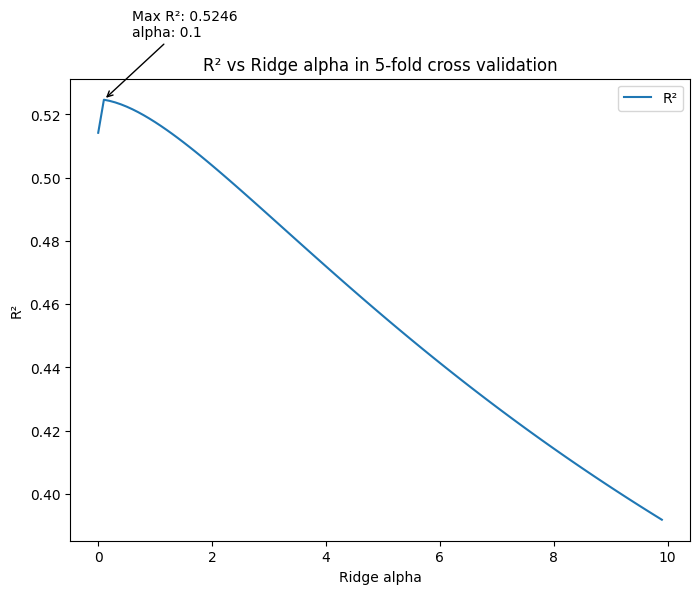

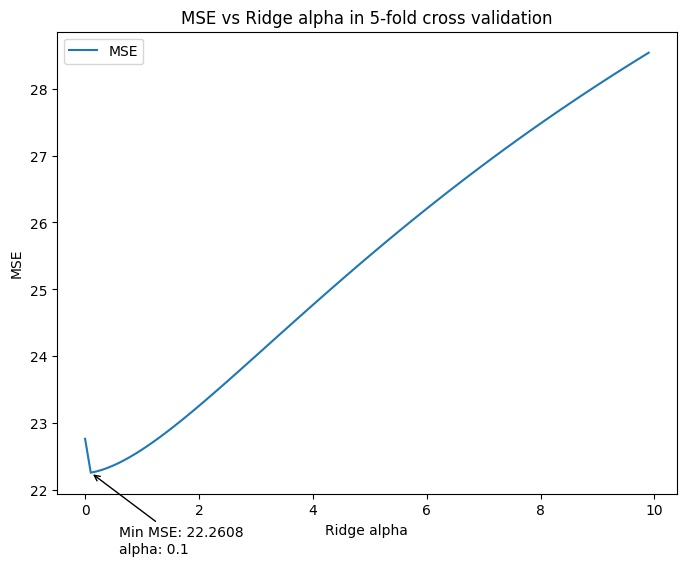

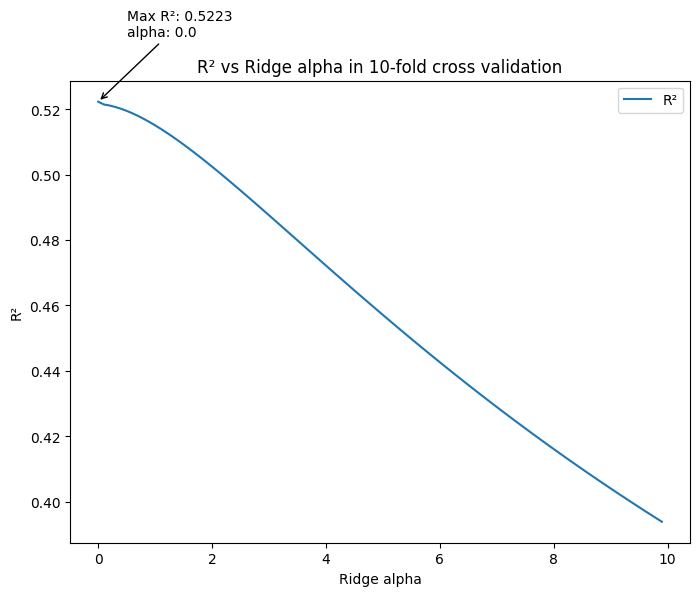

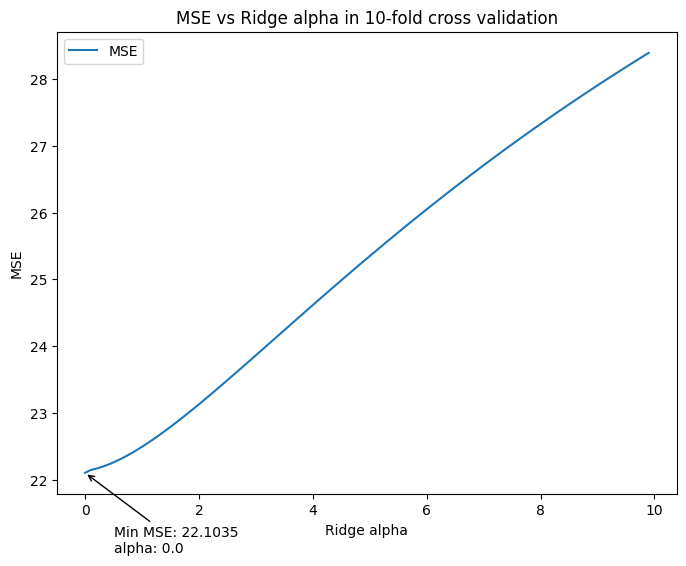

In [116]:
import matplotlib.pyplot as plt


#We first visualise the performance of the model that uses 5-fold cross validation
#across different values of alpha

# Plot R^2 vs Ridge alpha with annotation
plt.figure(figsize=(8, 6))
plt.plot(alphas, r2_5fold, label="R\u00b2")
plt.ylabel("R\u00b2")
plt.xlabel("Ridge alpha")
plt.title("R\u00b2 vs Ridge alpha in 5-fold cross validation")
plt.legend()

# Find the maximum R^2
max_r2_5fold = max(r2_5fold)

# Find the corresponding alpha value
max_r2_5fold_alpha = alphas[r2_5fold.index(max_r2_5fold)]

# Plot the point with maximum R^2 and the corresponding Ridge alpha value on the same axes
plt.annotate(f'Max R\u00b2: {max_r2_5fold:.4f}\nalpha: {max_r2_5fold_alpha:.1f}',
             xy=(max_r2_5fold_alpha, max_r2_5fold), xytext=(max_r2_5fold_alpha + 0.5, max_r2_5fold +0.02),
             arrowprops=dict(arrowstyle='->'))
plt.show()

# Plot MSE vs Ridge alpha with annotation
plt.figure(figsize=(8, 6))
plt.plot(alphas, mse_5fold, label="MSE")
plt.ylabel("MSE")
plt.xlabel("Ridge alpha")
plt.title("MSE vs Ridge alpha in 5-fold cross validation")
plt.legend()

# Find the minimium MSE
min_mse_5fold = min(mse_5fold)

# Find the corresponding alpha values
min_mse_5fold_alpha = alphas[mse_5fold.index(min_mse_5fold)]

# Plot the point with maximum R^2 and the corresponding Ridge alpha value on the same axes
plt.annotate(f'Min MSE: {min_mse_5fold:.4f}\nalpha: {min_mse_5fold_alpha:.1f}',
             xy=(min_mse_5fold_alpha, min_mse_5fold), xytext=(min_mse_5fold_alpha + 0.5, min_mse_5fold -1.2),
             arrowprops=dict(arrowstyle='->'))
plt.show()


#We visualise the performance of the model that uses 10-fold cross validation
#across different values of alpha

# Plot R^2 vs Ridge alpha with annotation
plt.figure(figsize=(8, 6))
plt.plot(alphas, r2_10fold, label="R\u00b2")
plt.ylabel("R\u00b2")
plt.xlabel("Ridge alpha")
plt.title("R\u00b2 vs Ridge alpha in 10-fold cross validation")
plt.legend()

# Find the maximum R^2
max_r2_10fold = max(r2_10fold)

# Find the corresponding alpha value
max_r2_10fold_alpha = alphas[r2_10fold.index(max_r2_10fold)]

# Plot the point with maximum R^2 and the corresponding Ridge alpha value on the same axes
plt.annotate(f'Max R\u00b2: {max_r2_10fold:.4f}\nalpha: {max_r2_10fold_alpha:.1f}',
             xy=(max_r2_10fold_alpha, max_r2_10fold), xytext=(max_r2_10fold_alpha + 0.5, max_r2_10fold +0.02),
             arrowprops=dict(arrowstyle='->'))

plt.show()


# Plot MSE vs Ridge alpha with annotation
plt.figure(figsize=(8, 6))
plt.plot(alphas, mse_10fold, label="MSE")
plt.ylabel("MSE")
plt.xlabel("Ridge alpha")
plt.title("MSE vs Ridge alpha in 10-fold cross validation")
plt.legend()

# Find the minimium MSE
min_mse_10fold = min(mse_10fold)

# Find the corresponding alpha values
min_mse_10fold_alpha = alphas[mse_10fold.index(min_mse_10fold)]

# Plot the point with maximum R^2 and the corresponding Ridge alpha value on the same axes
plt.annotate(f'Min MSE: {min_mse_10fold:.4f}\nalpha: {min_mse_10fold_alpha:.1f}',
             xy=(min_mse_10fold_alpha, min_mse_10fold), xytext=(min_mse_10fold_alpha + 0.5, min_mse_10fold -1.2),
             arrowprops=dict(arrowstyle='->'))

plt.show()

In both 5-fold and 10-fold cross validation, low ridge alpha scores were preferred, minimising the MSE and maximising the R<sup>2</sup> values. There appeared to be little difference between the best R<sup>2</sup> and MSE values for both 5-fold and 10-fold cross validation.

<br>

However, when considering MSE against Ridge alpha, we see that the MSE score initially decreases sharply as Ridge alpha increases for 5-fold cross validation, whereas MSE score only increases as Ridge alpha increases for 10-fold cross validation. Similarly, when considering R<sup>2</sup> against Ridge alpha, we see that the R<sup>2</sup> score initially increases sharply as Ridge alpha increases for 5-fold cross validation, whereas R<sup>2</sup> score only decreases as Ridge alpha increases for 10-fold cross validation.

<br>

This makes sense, since more folds of cross validation helps produce a more robust model, with less variance and less likelihood of overfitting, hence requiring lower Ridge alpha scores to obtain the best possible R<sup>2</sup> and MSE values in 10-fold cross validation.

<br>

Overall, this reflects what we learnt in lecture, that different Ridge alpha values may give a better performance in one metric and poorer performance in another. Further, as Ridge alpha values increase, both MSE and R<sup>2</sup> values increase, representing increasing oversimplification of the model.

# **Discussion of Obtained Results**

Even after applying cross-fold validation and optimising for values of alpha, MSE still remains high, while R<sup>2</sup> remains relatively low.

This could be attributed to three factors: <br>
1. The use of iterative imputation prior to training a model on the imputed data could increase bias, especially if the imputation model itself does not capture the relationship between the missing and observed data <br> <br>
2. Inherent data limitation as BMI influenced by other important factors are not present in the dataset such as diet, exercise habits, genetics, and medication regimens. <br> <br>
3. Inclusion of non-diabetic subjects alongside diabetic patients in the model. One would expect these two demographics to return different measurements in the provided input features.

# **Relation to Real World**

With the above in mind, we wanted to perform some additional exploratory analysis, to evaluate whether the model might show a good relation between BMI and the input features for **patients with confirmed diabetes**.

That way, if a good statistical relationship exists, in the absence of other clinical variables or data, we will still be able to flag patients with higher BMI for closer monitoring or intervention, as well as to support decisions on adjusting treatments, recommending lifestyle changes.

In [117]:
# Filter patients with confirmed diabetes
diabetes_df = shuffled_df[shuffled_df['Outcome'] == 1]

# Select only the feature columns (x_features) for these patients:
X_diabetes = diabetes_df[x_features]

# Input features (for predicting BMI)
x_features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
              "Insulin", "DiabetesPedigreeFunction", "Age"]

# Output feature
y_feature = "BMI"

# Feature matrix and target for diabetes-only data
X_diabetes = diabetes_df[x_features]
y_diabetes = diabetes_df[y_feature]

# Split diabetic data into training and testing sets (80% train, 20% test)
X_diab_train, X_diab_test, y_diab_train, y_diab_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=2)

# Create the pipeline for Linear Regression
pipeline_lr = Pipeline([
    ("scaler", MinMaxScaler()),        # Apply Min-Max scaling
    ("regressor", LinearRegression())  # Use Linear Regression
])

# Create the pipeline for Ridge Regression
pipeline_ridge = Pipeline([
    ("scaler", MinMaxScaler()),        # Apply Min-Max scaling
    ("regressor", Ridge(alpha=1))    # Use Ridge Regression
])

In [118]:
# Fit the Linear Regression pipeline with the training data
pipeline_lr.fit(X_diab_train, y_diab_train)

# Predict BMI on the test set using Linear Regression
y_pred_lr = pipeline_lr.predict(X_diab_test)

# Evaluate the Linear Regression model's performance
mse_lr = mean_squared_error(y_diab_test, y_pred_lr)
r2_lr = r2_score(y_diab_test, y_pred_lr)

# Print Linear Regression results
print(f"Linear Regression - MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")

# Fit the Ridge Regression pipeline with the training data
pipeline_ridge.fit(X_diab_train, y_diab_train)

# Predict BMI on the test set using Ridge Regression
y_pred_ridge = pipeline_ridge.predict(X_diab_test)

# Evaluate the Ridge Regression model's performance
mse_ridge = mean_squared_error(y_diab_test, y_pred_ridge)
r2_ridge = r2_score(y_diab_test, y_pred_ridge)

# Print Ridge Regression results
print(f"Ridge Regression - MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")

Linear Regression - MSE: 23.3138, R²: 0.4681
Ridge Regression - MSE: 24.8524, R²: 0.4329


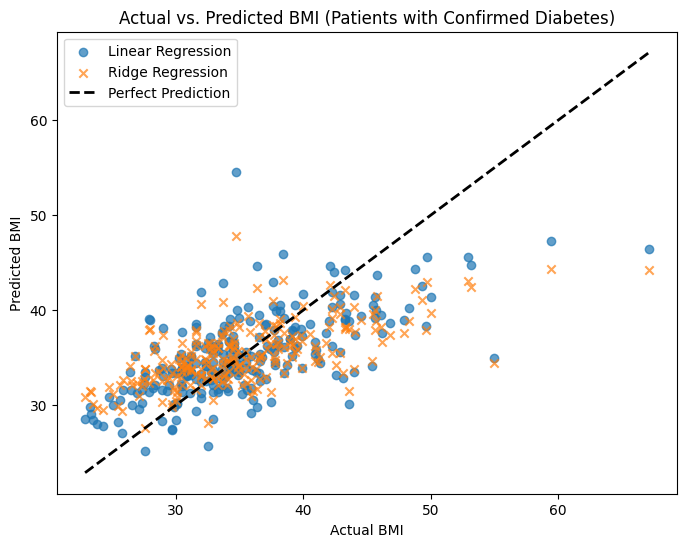

In [119]:
# Get predictions from Linear Regression pipeline
bmi_pred_lr = pipeline_lr.predict(X_diabetes)

# Get predictions from Ridge Regression pipeline
bmi_pred_ridge = pipeline_ridge.predict(X_diabetes)

# Add predictions to the dataframe
results_df = diabetes_df.copy()
results_df['BMI_Pred_LR'] = bmi_pred_lr
results_df['BMI_Pred_Ridge'] = bmi_pred_ridge

# Visualize Actual vs Predicted BMI
plt.figure(figsize=(8, 6))

# Plotting the predictions from Linear Regression
plt.scatter(results_df['BMI'], results_df['BMI_Pred_LR'], label='Linear Regression', alpha=0.7)

# Plotting the predictions from Ridge Regression
plt.scatter(results_df['BMI'], results_df['BMI_Pred_Ridge'], label='Ridge Regression', alpha=0.7, marker='x')

# Plot the perfect prediction line (where Actual = Predicted)
plt.plot([results_df['BMI'].min(), results_df['BMI'].max()],
         [results_df['BMI'].min(), results_df['BMI'].max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.legend()
plt.title('Actual vs. Predicted BMI (Patients with Confirmed Diabetes)')
plt.show()


Many points are close to the dashed line, showing that the models are making reasonable predictions. However, some scatter exists, especially for higher BMI values, indicating under-prediction for those patients whose BMI is higher, but predicted lower. <br> <br>

For very high actual BMI values (> 50), both models tend to predict lower values, suggesting that the models struggle with extreme BMI cases. <br> <br>

Hence, we now check the distribution of BMI to understand why the model may under-predict high BMI values.

In [120]:
# Statistical summary of BMI for confirmed diabetes patients
diabetes_df['BMI'].describe()

,BMI
count,252.000000
mean,35.369048
std,6.570421
min,22.900000
25%,30.975000
50%,34.300000
75%,38.550000
max,67.100000


Since the 75th percentile is 38.55, 75% of patients have BMI below this value. Separately, assuming a normal distribution, BMI > 48.5 (+2 standard deviations from mean)is in the top ~2.5% which are outliers or rare cases .

Models struggle with rare cases because they have few examples to learn from.

The scatter plot shows underestimation for BMI > 50 as the model had few high-BMI patients in training.

Since most data is between 31 and 38.5, the model "learns" to predict in that range well, but cannot handle extremes as effectively. Further, the use of Mix-Max scaling renders the model still sensitive to outliers. Hence, this leads to higher MSE and lower R².

# **Insights:**

Overall, however, the improvement of both MSE and R<sup>2</sup> when training the models on just the diabetic patients with a simple train-test split shows that BMI could be a feasible predictor of poor health inputs in the patients, especially in the case where devices and techniques needed for more in-depth measurements are not available.

The results also show that Linear Regression alone performs well enough, with no notable gains from regularization. This suggests that Linear Regression may be a practical choice for clinical settings where simplicity and interpretability are important.